# 911 Calls Emergency

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


#### Missing values in zip,twp and addr  columns

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
# Top 5 zip codes and there respective counts of calls
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
# Top 5 townships and there respective counts of calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
# No of different types of emergencies
len(df['title'].unique())

110

## EDA

In [55]:
# New column for emergency reasons
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

In [15]:
# Most common reasons of 911 calls
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

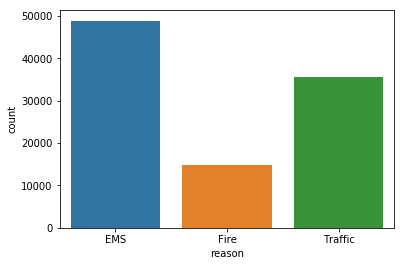

In [16]:
import seaborn as sb
sb.countplot(df['reason'])

In [17]:
df['timeStamp'].dtype

dtype('O')

In [18]:
#convert the column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[332])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
print(df['timeStamp'].iloc[34])

2015-12-10 18:26:02


In [20]:
df['month'] = df['timeStamp'].apply(lambda x :x.month)

In [21]:
df['timeStamp'].iloc[55149].day_name()[0:3]

'Sun'

In [22]:
df['Hour'] = df['timeStamp'].apply(lambda x :x.hour)

In [24]:
df['Day of week'] = df['timeStamp'].apply(lambda x :x.dayofweek)

In [25]:
df['Day of week'].iloc[23]

3

In [26]:
# Map day of week to its respective day name
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day name'] = df['Day of week'].map(dmap)

In [27]:
df['day name'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

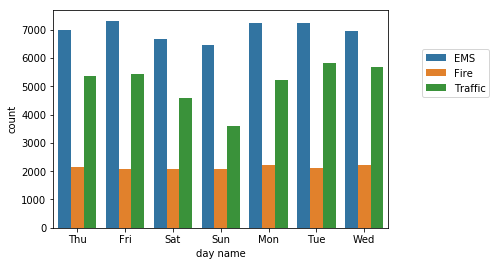

In [28]:
sb.countplot(df['day name'],hue = df['reason'])
plt.legend(loc = (1.1,0.6))

#### Insight: Calls for fire emergencies are constant on all days and EMS emergency calls occur at higher rate on every single day of the week

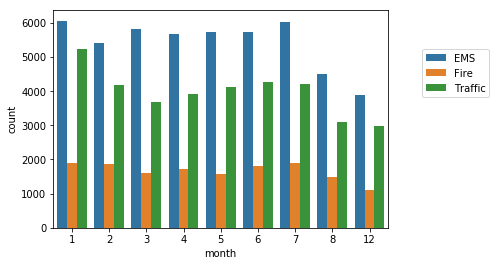

In [29]:
sb.countplot(df['month'],hue = df['reason'])
plt.legend(loc = (1.1,0.6))

#### Insight: Missing values in month axis and after month 7 no of calls are gradually decreasing

In [32]:
bymonth = df.groupby('month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of week,day name
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


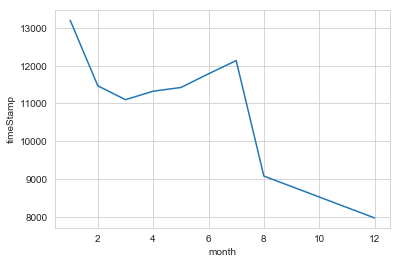

In [33]:
# Counts of calls by month
sb.set_style('whitegrid')
sb.lineplot(x = bymonth.index,y = bymonth.timeStamp) 
# or bymonth['lat'].plot()

In [44]:
bymonth.reset_index(inplace=True)

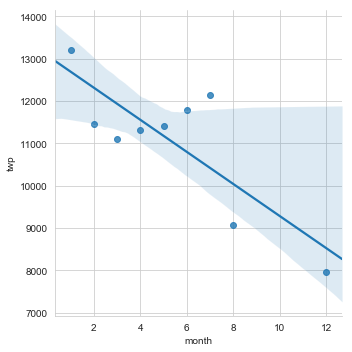

In [45]:
sb.lmplot(data=bymonth,x ='month',y = 'twp')

In [46]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

In [49]:
date_count = df.groupby('date').count()
date_count.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,Hour,Day of week,day name
date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


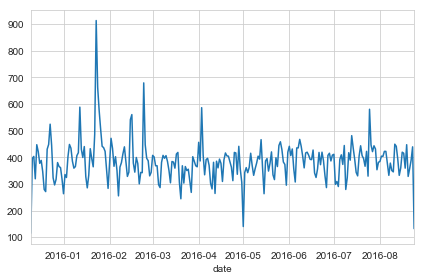

In [51]:
# plot count of calls on each day of month
date_count['lat'].plot()
plt.tight_layout()

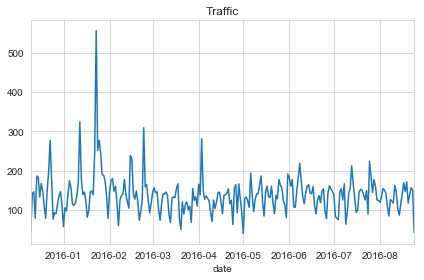

In [53]:
# plot for count of calls for Traffic emergency
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

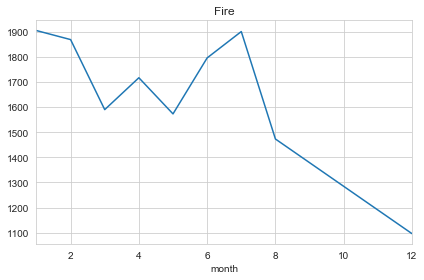

In [54]:
# plot for count of calls for Fire emergency
df[df['reason']=='Fire'].groupby('month').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

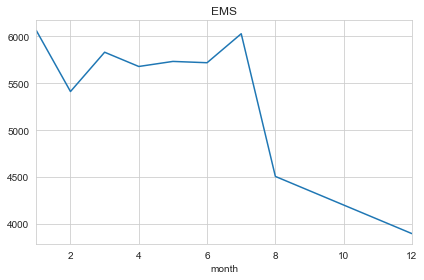

In [56]:
# plot for count of calls for EMS emergency
df[df['reason']=='EMS'].groupby('month').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [58]:
# restructure the dataframe 
matrix = df.groupby(['day name','Hour']).count()['reason'].unstack()
matrix

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<Figure size 864x504 with 0 Axes>

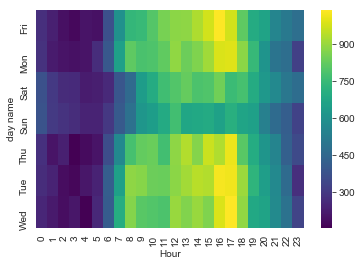

<Figure size 864x504 with 0 Axes>

In [60]:
sb.heatmap(matrix,cmap='viridis')
plt.figure(figsize=(12,7))

#### Insight: Most no of calls occured during the weekdays within the time frame of morning 6 am to evening 6 pm and very less no of calls on weekends

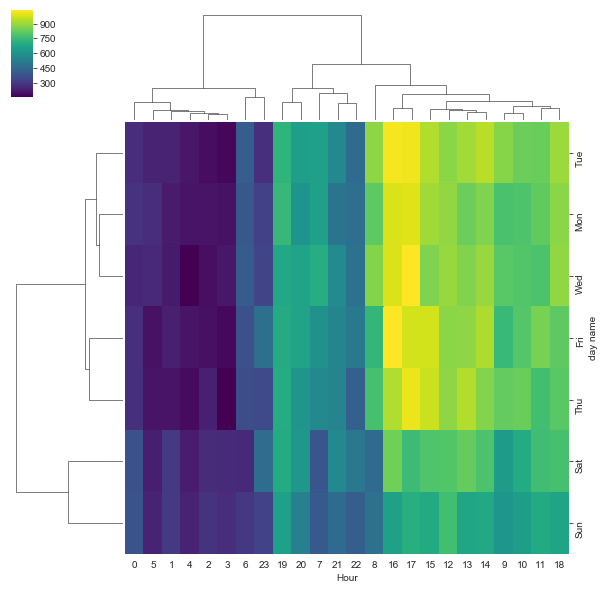

In [61]:
sb.clustermap(matrix,cmap='viridis')

In [62]:
month = df.groupby(['day name','month']).count()['reason'].unstack()
month

month,1,2,3,4,5,6,7,8,12
day name,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


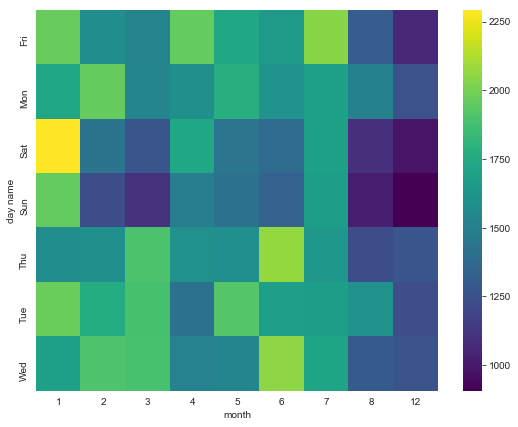

In [67]:
plt.figure(figsize=(9,7))
sb.heatmap(month,cmap='viridis')

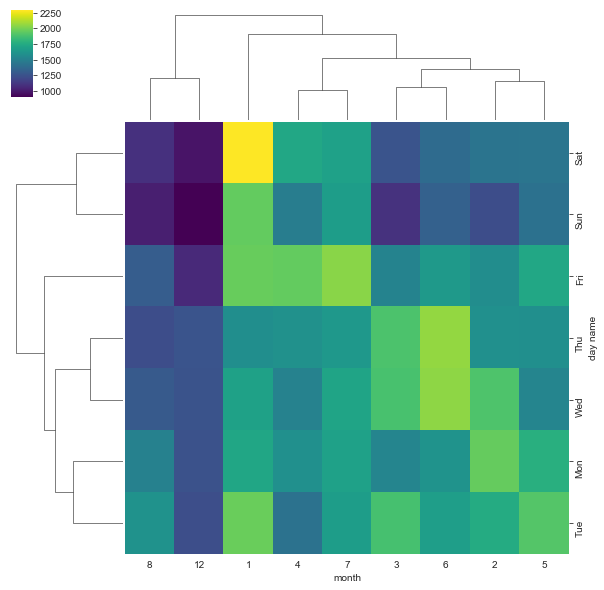

In [65]:
sb.clustermap(month,cmap='viridis')

#### Insight : Most no of calls occured in the month of january and mostly on saturdays and less no of calls in the month of August and December